In [1]:
import pandas as pd
import numpy as np
import sklearn
import os

In [2]:
csv_files = [k for k in os.listdir() if k.endswith(".csv")]

In [3]:
err_df = []
for k in csv_files:
    try:
        df = pd.read_csv(k, sep = ";",header=None)
        #print(df.columns.__len__())
        if df.columns.__len__() != 301:
            print(f"check cols in {k}")
            err_df.append(k)
    except:
        print(k)
print(f"err df: {err_df}")

analisys_pore_data_10013.csv
analisys_pore_data_28.csv
analisys_pore_data_13.csv
analisys_pore_data_32.csv
err df: []


In [4]:
dfs = []

for k in csv_files:
    try:
        df = pd.read_csv(k, sep = ";", header=None)
        number = k[k.rfind("_") + 1:k.rfind(".")]
        if len(number):
            number = number[-3:]
        df["Rock ID"] = number
        dfs.append(df)
    except:
        print(k)

analisys_pore_data_10013.csv
analisys_pore_data_28.csv
analisys_pore_data_13.csv
analisys_pore_data_32.csv


In [5]:
s = "analisys_pore_data_10013.csv"
print(len(s))
print(s.rfind("_"))
print(s[s.rfind("_") + 1:s.rfind(".")])
n = s[s.rfind("_") + 1:s.rfind(".")]
if len(n):
    print(n[-2:])

28
18
10013
13


In [6]:
data = pd.concat(dfs, ignore_index=True)

In [7]:
data["Rock ID"] = data["Rock ID"].astype(int).astype(str)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


ОБработаем пропуски

In [9]:
data.isna().sum().value_counts()

1        282
0         17
4          1
362        1
40045      1
Name: count, dtype: int64

In [10]:
data = data.drop(columns=[300])
data.shape

(40045, 301)

In [11]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.to_list()


In [12]:
ren_dict = {}
for k in numeric_cols:
    ren_dict[k] = str(k)

In [13]:
data=data.rename(ren_dict)

In [14]:
data[numeric_cols] = data[numeric_cols].replace([np.inf, -np.inf], np.nan)

In [15]:
imputer = SimpleImputer(strategy="mean")
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

In [16]:
#for col in numeric_cols:
#    z_score = (data[col] - data[col].mean()) / data[col].std()
#    data = data[abs(z_score) < 3]
data.shape #(0, 301)

(40045, 301)

In [17]:
columns_to_drop = []
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        zero_ratio = (data[col] == 0).mean()
        if zero_ratio > 0.5:
            columns_to_drop.append(col)
            
columns_to_drop.__len__()

164

In [18]:
data.drop(columns=columns_to_drop, inplace=True)

In [19]:
map_dict = {'10': "Кальциевый", 
 '02': "Чистый уратный", 
 '11': "", 
 '12': "", 
 '16': "Кальциевый", 
 '18': "Кальциевый",
 '19': "", 
 '25': "Кальциевый", 
 '27': "", 
 '28': "Уратный + кальций", 
 '30': "",
'31': "Кальциевый", 
'32': "Уратный + кальций", 
'33': "Чистый уратный", 
'34': "Кальциевый", 
'36': "Цистиновый", 
'37': "", 
'40': "", 
'43': "Кальциевый", 
'50': "Кальциевый", 
'51': "", 
'52': "Кальциевый",
'82': "", 
'53': "", 
'55': "", 
'2': "Чистый уратный", 
'9': "Кальциевый",
"153": "Цистиновый",
"155": "Уратный + кальций"}

In [20]:
map_dict = {'10': "", 
 '02': "Pure uric acid", 
 '11': "", 
 '12': "", 
 '16': "Calcium", 
 '18': "Calcium", 
 '19': "", 
 '25': "Calcium", 
 '27': "", 
 '28': "Uric acid with calcium", 
 '30': "",
'31': "Calcium", 
'32': "Uric acid with calcium", 
'33': "Pure uric acid", 
'34': "Calcium", 
'36': "Cystine", 
'37': "", 
'40': "", 
'43': "Calcium", 
'50': "Calcium", 
'51': "", 
'52': "Calcium",
'82': "", 
'53': "", 
'55': "", 
'2': "Pure uric acid", 
'9': "Calcium",
"155": "Uric acid with calcium",
"153": "Cystine"}

In [21]:
data["type"] = data["Rock ID"].map(map_dict)

/tmp/ipykernel_1781/1901726674.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["type"] = data["Rock ID"].map(map_dict)


In [22]:
data["type"].value_counts()

type
                          14898
Calcium                   12286
Pure uric acid             3822
Uric acid with calcium     3285
Cystine                    1832
Name: count, dtype: int64

In [23]:
data.shape

(40045, 138)

In [24]:
data.dtypes

0          float64
1          float64
2          float64
3          float64
4          float64
            ...   
167        float64
172        float64
176        float64
Rock ID     object
type        object
Length: 138, dtype: object

In [25]:
data["type"] = data["type"].astype(str)

In [26]:
# Создаем список значений для удаления
to_remove = ["", "","Cystine", "nan"]

# Фильтруем данные
data = data[~data["type"].isin(to_remove) & data["type"].notna()]

In [27]:
data

0            1          2         3             4         5  \
0      284005.0   538.477631  -6.366198  0.002396   6789.983871  2.773499   
1      285013.0   535.163923  -8.276057  0.002391  21744.720351  2.786968   
2      286073.0   534.335495  -5.729578  0.005928   9472.677022  1.748717   
3      286971.0   530.089806  -6.047888  0.002465  23861.585331  2.887474   
4      287945.0   535.681690  -3.819719  0.002746   1805.876419  2.650908   
...         ...          ...        ...       ...           ...       ...   
40040  471169.0  1750.052301 -58.887329  0.055171   9373.463417  1.241836   
40041  470120.0  1745.288845 -55.067610  0.055329  12432.640022  1.346880   
40042  468736.0  1753.987330 -49.019722  0.041334   5214.935626  1.210223   
40043  467335.0  1729.859390 -53.157751  0.041299   4875.128403  1.234066   
40044  466231.0  1716.397449 -54.430991  0.041265   4500.540838  1.211264   

                6            7            8            9  ...     157     158  \
0      215.712633  1985.901760   108.876833   108.876833  ...  6440.0  5220.0   
1      227.744263  2756.241581   105.980966   105.980966  ...  6343.0  5290.0   
2      290.272611  1353.426143   420.658851   420.658851  ...  6293.0  5192.0   
3      136.590439  2796.062059    88.354020    88.354020  ...  6365.0  5243.0   
4      150.418867   638.892812    91.206810    91.206810  ...  6537.0  5428.0   
...           ...          ...          ...          ...  ...     ...     ...   
40040  860.618601  6257.916839  4258.841021  4258.841021  ...  2615.0  2396.0   
40041  740.716759  7013.201090  3650.112766  3650.112766  ...  2517.0  2421.0   
40042  571.059569  3314.052647  2114.644334  2114.644334  ...  2645.0  2429.0   
40043  522.785865  3116.637840  2088.720048  2088.720048  ...  2581.0  2379.0   
40044  536.187256  2873.930682  1993.151393  1993.151393  ...  2678.0  2398.0   

          161     163     165    167    172   176  Rock ID     type  
0      2867.0  1691.0   981.0  507.0   80.0   8.0       52  Calcium  
1      2904.0  1655.0  1010.0  576.0   76.0  12.0       52  Calcium  
2      2714.0  1722.0  1020.0  580.0   70.0  10.0       52  Calcium  
3      2776.0  1709.0   962.0  527.0   78.0  20.0       52  Calcium  
4      2832.0  1754.0   956.0  563.0   80.0  18.0       52  Calcium  
...       ...     ...     ...    ...    ...   ...      ...      ...  
40040  1783.0  1455.0  1042.0  766.0  247.0  92.0        9  Calcium  
40041  1820.0  1458.0  1102.0  779.0  280.0  83.0        9  Calcium  
40042  1779.0  1444.0  1101.0  791.0  255.0  79.0        9  Calcium  
40043  1842.0  1394.0  1058.0  720.0  280.0  76.0        9  Calcium  
40044  1964.0  1428.0  1035.0  755.0  272.0  83.0        9  Calcium  

[19393 rows x 138 columns]

In [28]:
data["type"].value_counts()

type
Calcium                   12286
Pure uric acid             3822
Uric acid with calcium     3285
Name: count, dtype: int64

In [29]:
data_learning = data.copy()

In [30]:
data_learning.shape

(19393, 138)

In [31]:
data_learning["type"].value_counts()

type
Calcium                   12286
Pure uric acid             3822
Uric acid with calcium     3285
Name: count, dtype: int64

In [32]:
# 2. Получение уникальных ID камней с их типами
unique_rocks = data_learning[['Rock ID', 'type']].drop_duplicates()

# 3. Стратифицированное разделение ID
train_ids, test_ids = train_test_split(
    unique_rocks['Rock ID'],
    test_size=0.2,  # Размер тестовой выборки
    random_state=42,
    stratify=unique_rocks['type']  # Сохраняем пропорции типов
)

# 4. Создание выборок
train_data = data_learning[data_learning['Rock ID'].isin(train_ids)]
test_data = data_learning[data_learning['Rock ID'].isin(test_ids)]

# 5. Проверка распределения типов
print("Train распределение:")
print(train_data['type'].value_counts(normalize=True))
print("\nTest распределение:")
print(test_data['type'].value_counts(normalize=True))

Train распределение:
type
Calcium                   0.621968
Pure uric acid            0.251232
Uric acid with calcium    0.126799
Name: proportion, dtype: float64

Test распределение:
type
Calcium                   0.675598
Uric acid with calcium    0.324402
Name: proportion, dtype: float64


In [33]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1. Получение уникальных ID камней с их типами
unique_rocks = data_learning[['Rock ID', 'type']].drop_duplicates()

# 2. Стратифицированное разделение с гарантией всех типов в тесте
train_ids = pd.Series(dtype='object')
test_ids = pd.Series(dtype='object')

# Для каждого типа камней разделяем отдельно
for stone_type in unique_rocks['type'].unique():
    type_subset = unique_rocks[unique_rocks['type'] == stone_type]
    
    # Вычисляем размер тестовой выборки для типа (минимум 1 образец)
    n = len(type_subset)
    n_test = max(1, int(0.2 * n))  # Гарантируем хотя бы 1 образец
    
    # Разделение для текущего типа
    type_train, type_test = train_test_split(
        type_subset['Rock ID'],
        test_size=n_test,
        random_state=42
    )
    
    train_ids = pd.concat([train_ids, type_train])
    test_ids = pd.concat([test_ids, type_test])

# 3. Создание итоговых выборок
train_data = data_learning[data_learning['Rock ID'].isin(train_ids)]
test_data = data_learning[data_learning['Rock ID'].isin(test_ids)]

# 4. Проверка распределения
print("Train распределение:")
print(train_data['type'].value_counts(normalize=True))
print("\nTest распределение:")
print(test_data['type'].value_counts(normalize=True))

Train распределение:
type
Calcium                   0.703699
Pure uric acid            0.149784
Uric acid with calcium    0.146517
Name: proportion, dtype: float64

Test распределение:
type
Pure uric acid            0.373992
Calcium                   0.371058
Uric acid with calcium    0.254950
Name: proportion, dtype: float64


In [34]:
X_train = train_data.drop(columns = ['Rock ID', "type"], axis=1)
#y = train_data[['type', 'Rock ID']]
y_trian= train_data["type"]
le = LabelEncoder()
y_train_encoded= le.fit_transform(y_trian)
X_test = test_data.drop(columns = ['Rock ID', "type"], axis=1)

y_test= test_data["type"]
y_test_encoded= le.fit_transform(y_test)

In [35]:
# Преобразуем метки в строки перед кодированием
y = train_data["type"].astype(str)
y_test = test_data["type"].astype(str)

# Затем применяем LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y)
y_test_encoded = le.transform(y_test)

# В отчете можно использовать оригинальные строки
#print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

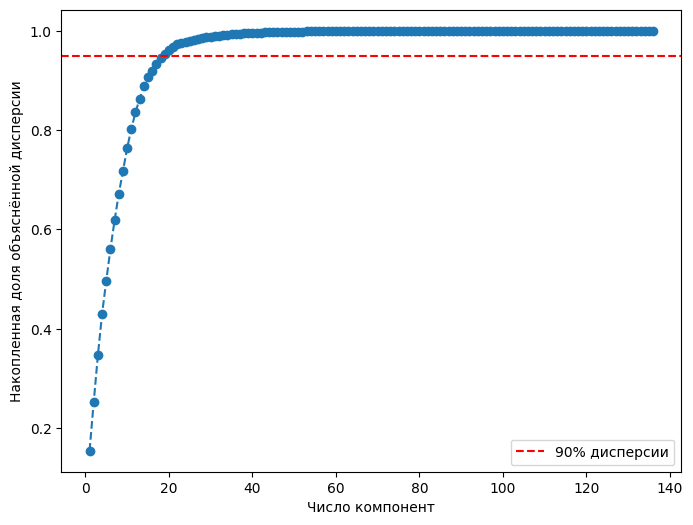

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=None)
pca.fit(X_scaled)

#накопленная доля объяснённой дисперсии
explained_variance = np.cumsum(pca.explained_variance_ratio_)

#построение графика
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Число компонент')
plt.ylabel('Накопленная доля объяснённой дисперсии')
plt.axhline(y=0.95, color='r', linestyle='--', label='90% дисперсии')#так максимально сохраним информацию при минимальной сложности вычислений
plt.legend()
plt.show()

In [37]:
optimal_n_components = np.where(explained_variance >= 0.95)[0][0] + 1
print(f"Оптимальное число компонент: {optimal_n_components}")

# Создаём PCA с оптимальным числом компонент
pca = PCA(n_components=optimal_n_components)

Оптимальное число компонент: 19


In [38]:
y_train_encoded

array([0, 0, 0, ..., 0, 0, 0], shape=(15302,))

2025-08-15 09:41:37.944535: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-15 09:41:38.671943: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-15 09:41:41.003758: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/wsl/miniconda3/lib/python3.13/site-packages/umap/umap_.py:1952

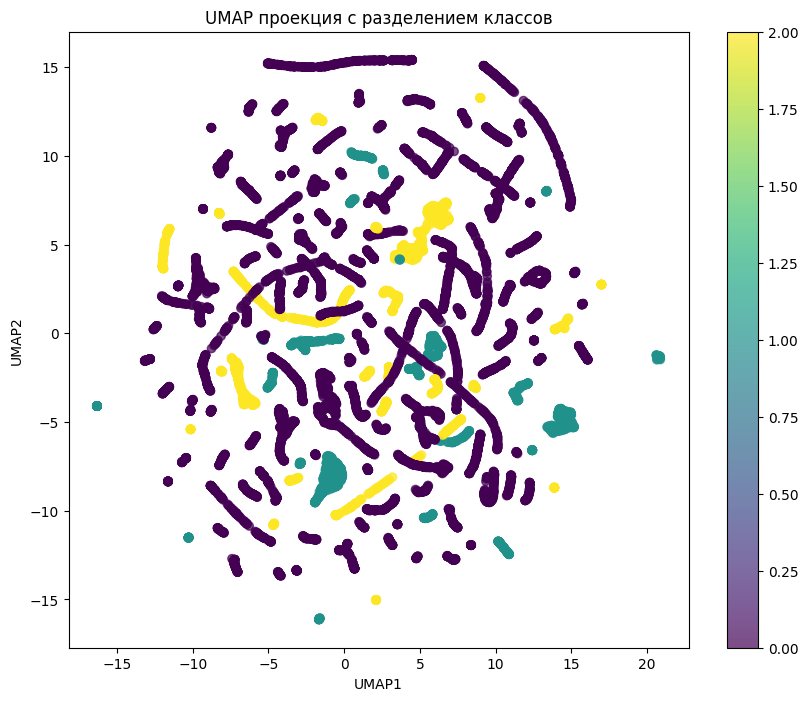

In [39]:
import umap
import matplotlib.pyplot as plt

# Создание UMAP модели
umap_model = umap.UMAP(
    n_components=2,          # Для визуализации используем 2D
    n_neighbors=15,          # Меньше значений = более локальная структура
    min_dist=0.1,            # Меньше значений = плотнее кластеры
    random_state=42,
    metric='euclidean'
)

# Применение к данным
X_umap = umap_model.fit_transform(X_scaled)

# Визуализация
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train_encoded, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title('UMAP проекция с разделением классов')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

In [40]:
import matplotlib.patches as mpatches

/home/wsl/miniconda3/lib/python3.13/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


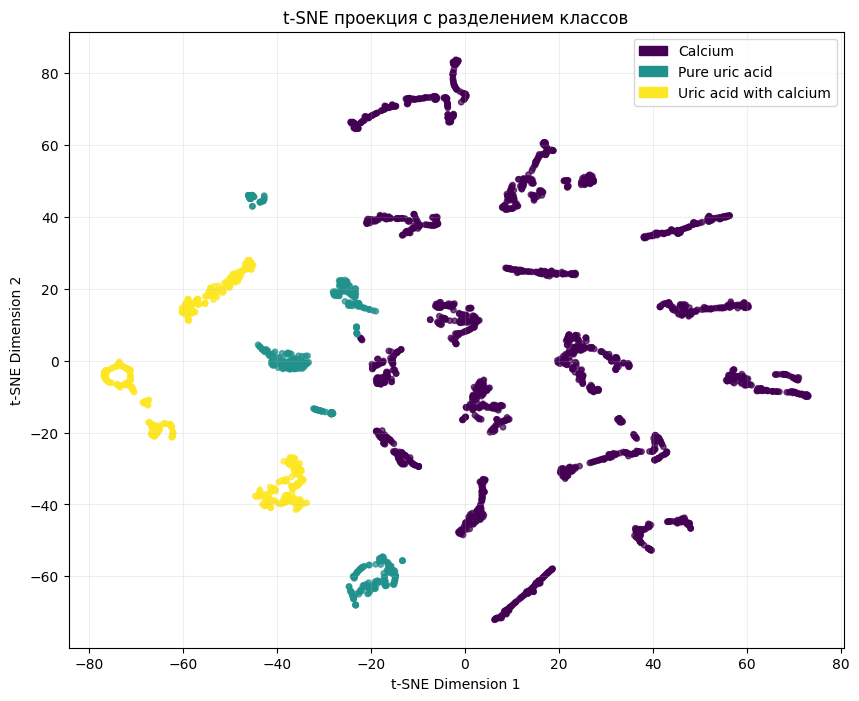

In [41]:
from sklearn.manifold import TSNE

# Создание подвыборки для больших данных
sample_size = min(3000, X_scaled.shape[0])
np.random.seed(42)
sample_idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sample = X_scaled[sample_idx]
y_sample = y_train_encoded[sample_idx]

# Создание t-SNE модели
tsne = TSNE(
    n_components=2,
    perplexity=30,
    n_iter=1000,
    random_state=42,
    init='pca',
    learning_rate=200
)

# Применение к данным
X_tsne = tsne.fit_transform(X_sample)

# Визуализация
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='viridis', alpha=0.7, s=15)
plt.title('t-SNE проекция с разделением классов')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Создание легенды
patches = [mpatches.Patch(color=plt.cm.viridis(i/(len(le.classes_)-1)), label=name) for i, name in enumerate(le.classes_)]
plt.legend(handles=patches)

plt.grid(alpha=0.2)
plt.show()

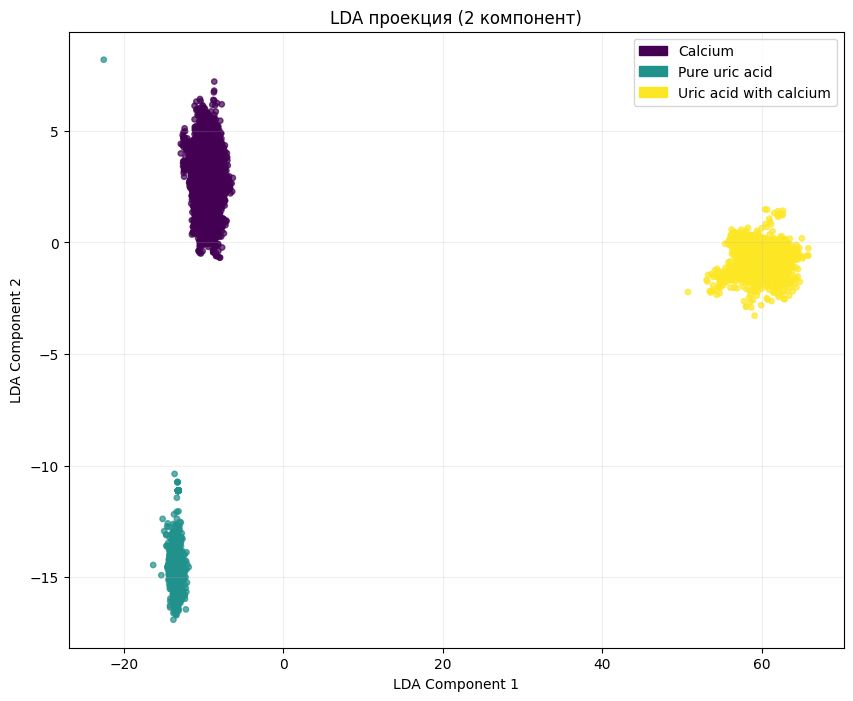

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Определение числа компонент
n_components = min(len(le.classes_) - 1, X_scaled.shape[1])

if n_components > 0:
    # Создание LDA модели
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_lda = lda.fit_transform(X_scaled, y_train_encoded)
    
    # Визуализация
    plt.figure(figsize=(10, 8))
    
    if n_components == 1:
        # Для 1 компоненты используем точечный график
        plt.scatter(X_lda, np.zeros_like(X_lda), c=y_train_encoded, cmap='viridis', alpha=0.7, s=15)
        plt.yticks([])
    else:
        # Для 2+ компонент
        scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_train_encoded, cmap='viridis', alpha=0.7, s=15)
    
    plt.title(f'LDA проекция ({n_components} компонент)')
    plt.xlabel('LDA Component 1')
    if n_components > 1:
        plt.ylabel('LDA Component 2')
    
    # Создание легенды
    patches = [mpatches.Patch(color=plt.cm.viridis(i/(len(le.classes_)-1)), label=name) for i, name in enumerate(le.classes_)]
    plt.legend(handles=patches)
    plt.grid(alpha=0.2)
    plt.show()
else:
    print("LDA требует как минимум 2 класса для визуализации")

/home/wsl/miniconda3/lib/python3.13/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 20 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/wsl/miniconda3/lib/python3.13/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/wsl/miniconda3/lib/python3.13/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/wsl/miniconda3/lib/python3.13/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.f

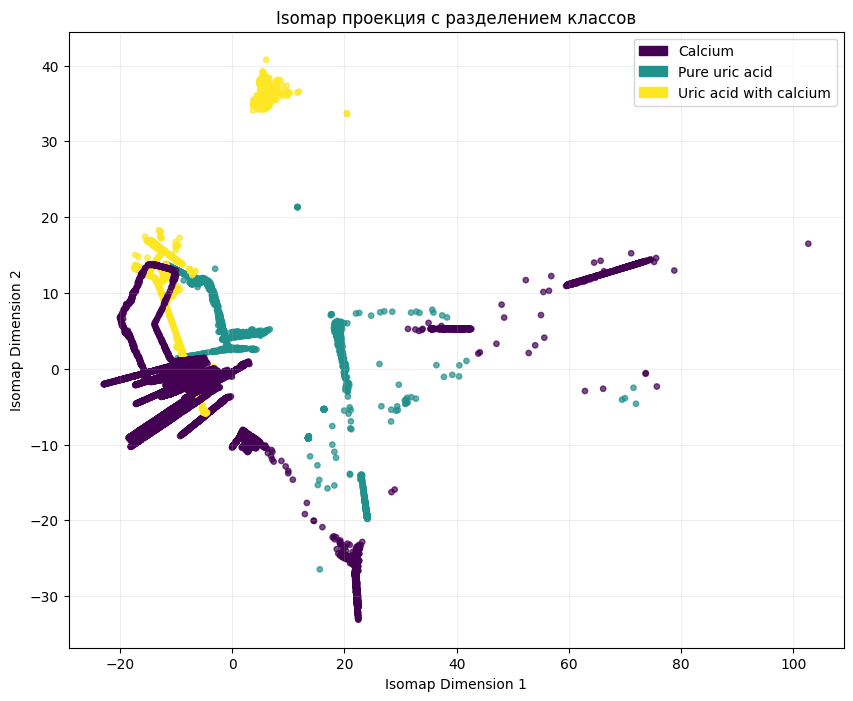

In [43]:
from sklearn.manifold import Isomap

# Создание Isomap модели
isomap = Isomap(
    n_components=2,
    n_neighbors=15,
    eigen_solver='dense'
)

# Применение к данным
X_isomap = isomap.fit_transform(X_scaled)

# Визуализация
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_train_encoded, cmap='viridis', alpha=0.7, s=15)
plt.title('Isomap проекция с разделением классов')
plt.xlabel('Isomap Dimension 1')
plt.ylabel('Isomap Dimension 2')

# Создание легенды
patches = [mpatches.Patch(color=plt.cm.viridis(i/(len(le.classes_)-1)), label=name) for i, name in enumerate(le.classes_)]
plt.legend(handles=patches)
plt.grid(alpha=0.2)
plt.show()

In [43]:
X_scaled

array([[-0.84292725, -0.93835516,  0.5228483 , ..., -0.27801566,
        -0.35462261, -0.28416101],
       [-0.83876702, -0.9408943 ,  0.51556023, ..., -0.2599933 ,
        -0.35517981, -0.2834996 ],
       [-0.83439218, -0.94152909,  0.52527766, ..., -0.25894852,
        -0.35601561, -0.28383031],
       ...,
       [-0.0805033 , -0.00696694,  0.36008132, ..., -0.20383665,
        -0.33024508, -0.27242095],
       [-0.08628552, -0.02545505,  0.34429049, ..., -0.22238141,
        -0.32676258, -0.27291701],
       [-0.09084197, -0.03577031,  0.33943178, ..., -0.21323963,
        -0.32787698, -0.27175953]], shape=(15302, 136))

In [44]:
X_lda

array([[-12.44817529,   2.95066924],
       [-12.46350578,   3.3621064 ],
       [-12.58159336,   3.56015761],
       ...,
       [ -8.36639814,   0.32718156],
       [ -8.00737402,   0.28521874],
       [ -8.16608197,  -0.10688982]], shape=(15302, 2))

In [45]:
X_scaled

array([[-0.84292725, -0.93835516,  0.5228483 , ..., -0.27801566,
        -0.35462261, -0.28416101],
       [-0.83876702, -0.9408943 ,  0.51556023, ..., -0.2599933 ,
        -0.35517981, -0.2834996 ],
       [-0.83439218, -0.94152909,  0.52527766, ..., -0.25894852,
        -0.35601561, -0.28383031],
       ...,
       [-0.0805033 , -0.00696694,  0.36008132, ..., -0.20383665,
        -0.33024508, -0.27242095],
       [-0.08628552, -0.02545505,  0.34429049, ..., -0.22238141,
        -0.32676258, -0.27291701],
       [-0.09084197, -0.03577031,  0.33943178, ..., -0.21323963,
        -0.32787698, -0.27175953]], shape=(15302, 136))

In [46]:
#X_pca = pca.fit_transform(X_scaled)
X_pca = X_scaled

In [47]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

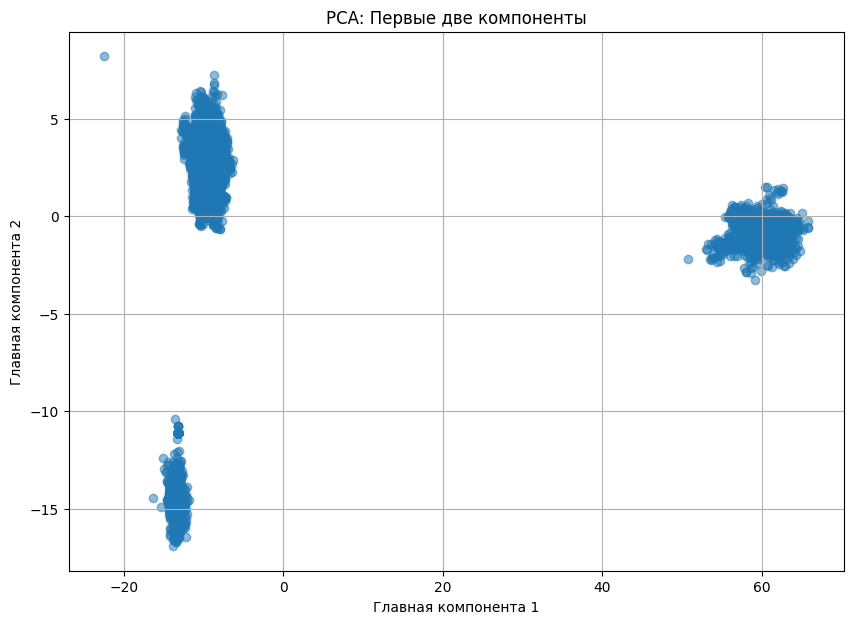

In [48]:
import matplotlib.pyplot as plt

# Предположим, что `pca_data` — ваш массив данных после PCA (размер: n_samples x 19)
plt.figure(figsize=(10, 7))
plt.scatter(X_lda [:, 0], X_lda [:, 1], alpha=0.5)
plt.title("PCA: Первые две компоненты")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid(True)
plt.show()

In [49]:
test_data

0            1           2         3             4         5  \
10805  561156.0  7069.486422 -393.112709  0.196643   1195.642023  1.032925   
10806  561268.0  7140.524048 -388.338061  0.197121   1467.207038  1.007185   
10807  560785.0  7145.391058 -392.794400  0.198474   1557.962704  1.014940   
10808  561953.0  7041.216347 -405.208485  0.197733   1697.607301  0.997305   
10809  563150.0  7041.112793 -393.431019  0.196750   2164.087154  0.987986   
...         ...          ...         ...       ...           ...       ...   
38442  339673.0   891.387586 -104.723953  0.007741  93413.628679  0.887384   
38443  338790.0   888.902305  -93.901416  0.008023  85480.346715  0.936574   
38444  337978.0   854.833239  -84.988740  0.008106  43649.223389  0.981007   
38445  337132.0   864.981472  -88.808458  0.008094  47121.252635  0.960890   
38446  336214.0   888.177431 -100.267614  0.008505  93315.327323  0.898141   

                 6             7           8           9  ...  157      158  \
10805   281.105631    827.926783  570.005781  570.005781  ...  0.0      0.0   
10806   314.825907   1001.397958  699.531099  699.531099  ...  0.0      0.0   
10807   315.988481   1039.129949  709.026976  709.026976  ...  0.0      0.0   
10808   330.169901   1097.891215  716.544920  716.544920  ...  0.0      0.0   
10809   374.588427   1472.913607  931.596829  931.596829  ...  0.0      0.0   
...            ...           ...         ...         ...  ...  ...      ...   
38442  2968.374827  63749.954340  421.595472  421.595472  ...  0.0  34279.0   
38443  2877.360914  56934.278467  417.633577  417.633577  ...  0.0  34056.0   
38444  1493.750946  31011.294714  220.390297  220.390297  ...  0.0  34186.0   
38445  1639.542583  32186.843330  238.634315  238.634315  ...  0.0  33987.0   
38446  2703.956965  56153.477115  405.554092  405.554092  ...  0.0  34079.0   

           161  163      165  167  172  176  Rock ID                    type  
10805      0.0  0.0      0.0  0.0  0.0  0.0       32  Uric acid with calcium  
10806      0.0  0.0      0.0  0.0  0.0  0.0       32  Uric acid with calcium  
10807      0.0  0.0      0.0  0.0  0.0  0.0       32  Uric acid with calcium  
10808      0.0  0.0      0.0  0.0  0.0  0.0       32  Uric acid with calcium  
10809      0.0  0.0      0.0  0.0  0.0  0.0       32  Uric acid with calcium  
...        ...  ...      ...  ...  ...  ...      ...                     ...  
38442  32422.0  0.0  26829.0  0.0  0.0  0.0       16                 Calcium  
38443  32127.0  0.0  27243.0  0.0  0.0  0.0       16                 Calcium  
38444  32125.0  0.0  26994.0  0.0  0.0  0.0       16                 Calcium  
38445  32108.0  0.0  27250.0  0.0  0.0  0.0       16                 Calcium  
38446  32167.0  0.0  27245.0  0.0  0.0  0.0       16                 Calcium  

[4091 rows x 138 columns]

In [50]:
X_test = test_data.drop(columns = [ "Rock ID","type"], axis=1)
y_test = test_data['type']

In [51]:
test_data['type']

10805    Uric acid with calcium
10806    Uric acid with calcium
10807    Uric acid with calcium
10808    Uric acid with calcium
10809    Uric acid with calcium
                  ...          
38442                   Calcium
38443                   Calcium
38444                   Calcium
38445                   Calcium
38446                   Calcium
Name: type, Length: 4091, dtype: object

In [52]:
# Применяем PCA к обучающим данным


# Для тестовых данных: только transform (не fit_transform!)
X_test_scaled = scaler.transform(X_test)  # Масштабирование
#X_test_pca = pca.transform(X_test_scaled)
X_test_pca = X_test_scaled

In [53]:
X_test_lda = lda.transform(X_test_scaled)
X_test_lda

array([[ 53.21370543, -18.74384142],
       [ 53.37952764, -18.55382417],
       [ 54.33946748, -18.79591336],
       ...,
       [-29.36271812,   1.23448849],
       [-29.22217295,   1.44944273],
       [-29.58025206,   1.21793151]], shape=(4091, 2))

In [54]:
set(y_test)

{'Calcium', 'Pure uric acid', 'Uric acid with calcium'}

In [55]:
y_test= le.transform(y_test)
y_test

array([2, 2, 2, ..., 0, 0, 0], shape=(4091,))

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape

(12241, 2)

In [58]:
y_train.shape

(12241,)

In [59]:
y_train = le.transform(y_train)

In [60]:
y_train

array([2, 0, 0, ..., 0, 1, 0], shape=(12241,))

In [61]:
le.classes_

array(['Calcium', 'Pure uric acid', 'Uric acid with calcium'],
      dtype=object)

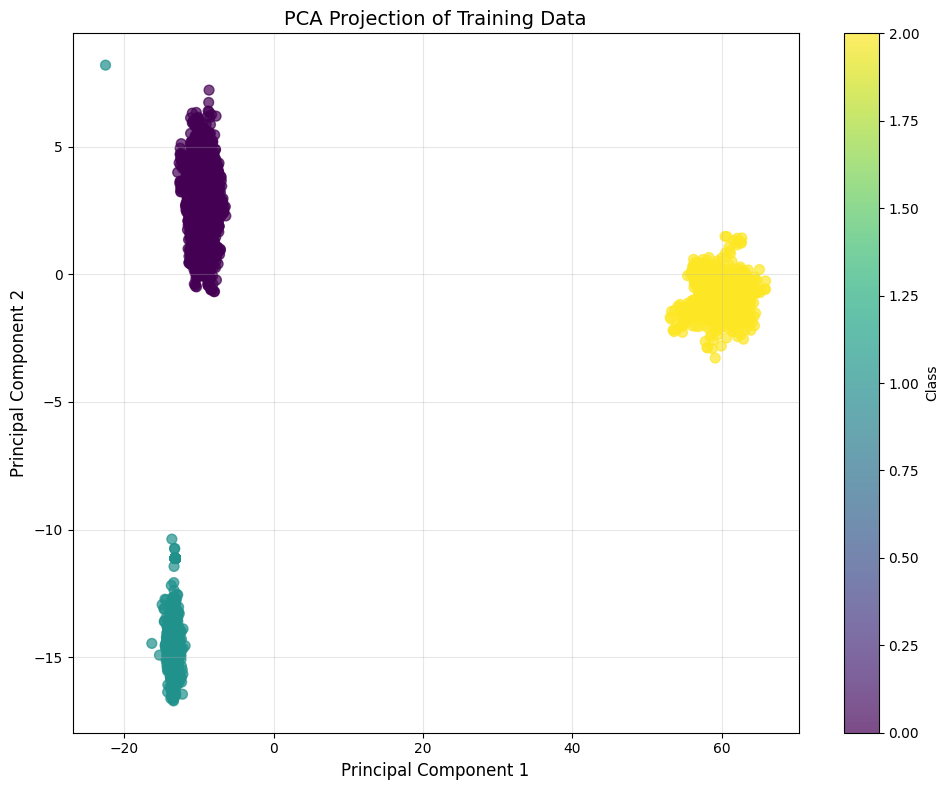

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Преобразуем данные в массив NumPy
X_pca = np.array(X_train)

# Создаем scatter plot
plt.figure(figsize=(10, 8))

# Рисуем точки для каждого класса
plt.scatter(
    X_pca[:, 0],  # Первая компонента
    X_pca[:, 1],  # Вторая компонента
    c=y_train,    # Цвета по меткам классов
    cmap='viridis',
    alpha=0.7,
    s=50          # Размер точек
)

# Добавляем подписи
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('PCA Projection of Training Data', fontsize=14)
plt.colorbar(label='Class')
plt.grid(alpha=0.3)
plt.tight_layout()

# Показать график
plt.show()

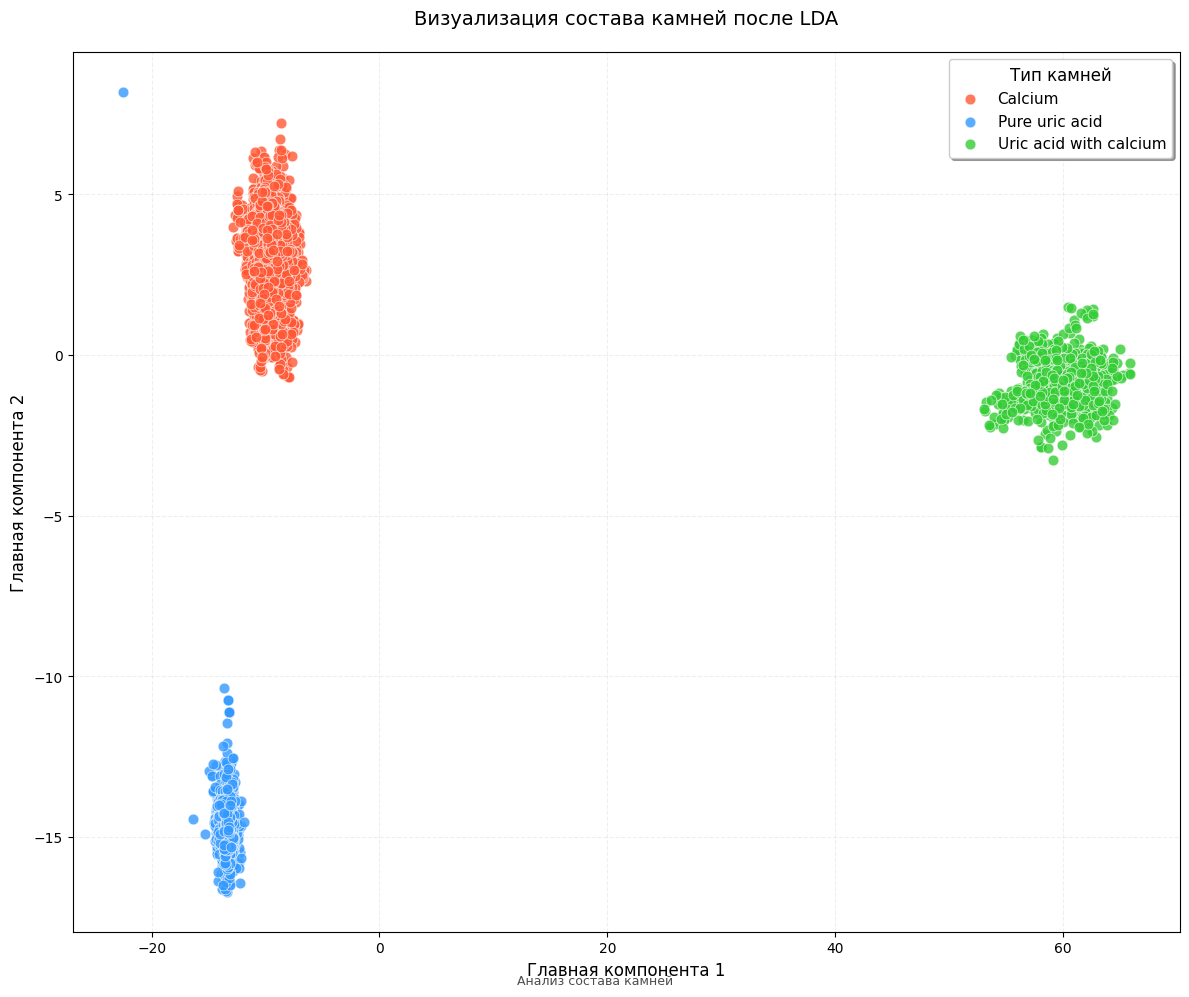

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Предположим, что le - это ваш LabelEncoder
class_names = le.classes_  # ['Calcium', 'Cystine', 'Pure uric acid', 'Uric acid with calcium']

plt.figure(figsize=(12, 10))

# Создаем палитру цветов для классов
colors = ['#FF5733', '#3399FF', '#33CC33', '#CC33FF']  # Оранжевый, Синий, Зеленый, Фиолетовый

# Создаем словарь для названий классов
class_dict = {i: name for i, name in enumerate(class_names)}

# Рисуем каждый класс отдельно
for class_idx in range(len(class_names)):
    # Выбираем только точки текущего класса
    mask = (y_train == class_idx)
    
    plt.scatter(
        X_train[mask, 0],  # Первая компонента PCA
        X_train[mask, 1],  # Вторая компонента PCA
        c=colors[class_idx],
        label=class_dict[class_idx],
        alpha=0.8,
        s=60,
        edgecolor='w',
        linewidth=0.5
    )

# Добавляем легенду с названиями классов
plt.legend(title='Тип камней', title_fontsize=12, fontsize=11, 
           loc='best', frameon=True, shadow=True)

# Настраиваем оформление
plt.title('Визуализация состава камней после LDA', fontsize=14, pad=20)
plt.xlabel('Главная компонента 1', fontsize=12)
plt.ylabel('Главная компонента 2', fontsize=12)
plt.grid(alpha=0.2, linestyle='--')

# Добавляем информационный текст
plt.figtext(0.5, 0.01, 'Анализ состава камней', 
            ha='center', fontsize=9, alpha=0.7)

plt.tight_layout()
plt.show()

In [64]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

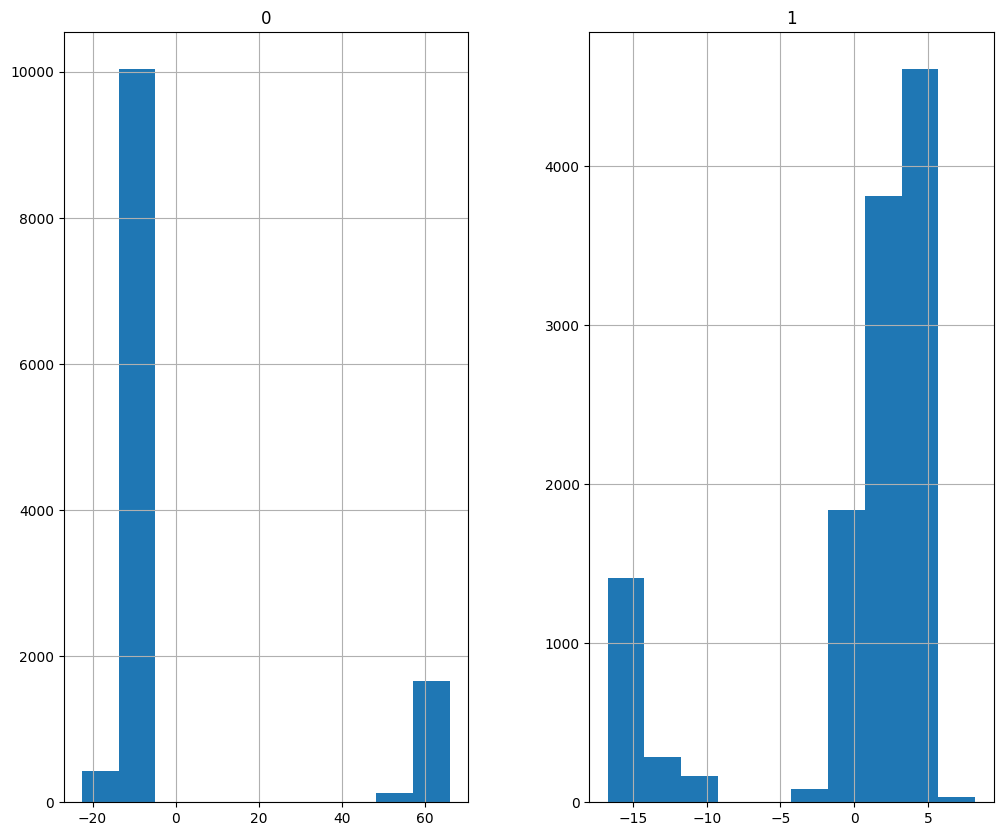

In [65]:
X_train_df = pd.DataFrame(X_train)
X_train_df.hist(figsize=(12,10))

In [66]:
X_train

array([[ 5.99296425e+01,  5.57792439e-02],
       [-9.27115648e+00,  3.19820988e+00],
       [-8.94543851e+00,  3.20873695e+00],
       ...,
       [-1.10276802e+01,  2.62827764e+00],
       [-1.30003847e+01, -1.53241846e+01],
       [-9.38669183e+00,  3.25840192e+00]], shape=(12241, 2))

In [67]:
X_test_lda

array([[ 53.21370543, -18.74384142],
       [ 53.37952764, -18.55382417],
       [ 54.33946748, -18.79591336],
       ...,
       [-29.36271812,   1.23448849],
       [-29.22217295,   1.44944273],
       [-29.58025206,   1.21793151]], shape=(4091, 2))

In [68]:
X_val

array([[ -9.43609888,   3.68810787],
       [ -9.27816875,   3.22660511],
       [ -9.89452147,   2.18417653],
       ...,
       [-10.71332203,   3.74409371],
       [ -9.90482444,   3.85839852],
       [ -8.52885151,   3.42332873]], shape=(3061, 2))

In [69]:
y_train

array([2, 0, 0, ..., 0, 1, 0], shape=(12241,))

In [70]:
y_test_encoded

array([2, 2, 2, ..., 0, 0, 0], shape=(4091,))

In [71]:
y_val_encoded = le.transform(y_val)

In [72]:
y_val_encoded 

array([0, 0, 0, ..., 0, 0, 0], shape=(3061,))

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [75]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Преобразуем метки в числовые
#y_train_ = le.transform(y_train)
y_train_ = y_train
# Вычисляем базовые веса классов
classes = np.unique(y_train_)
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=classes, 
    y=y_train
)
class_weights_dict = dict(zip(classes, class_weights))

# Увеличиваем вес класса 2 (Pure uric acid) в 10 раз
class_weights_dict[2] *= 20.0
print("Class weights:", class_weights_dict)

Class weights: {np.int64(0): np.float64(0.47423678909034556), np.int64(1): np.float64(2.1913712853562477), np.int64(2): np.float64(45.9755868544601)}


In [76]:
#log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced", C=0.23357214690901212, l1_ratio=0.1, penalty= "l2", solver= "saga")
log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced", C=0.23357214690901212, l1_ratio=0.05, penalty= "l2", solver= "lbfgs")
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, class_weight='balanced',
                   l1_ratio=0.05, max_iter=5000, random_state=42)

In [77]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', C=0.53357214690901212, class_weight='balanced', probability=True, max_iter=5000, random_state=42)
svm_model.fit(X_train, y_train)

SVC(C=0.5335721469090121, class_weight='balanced', kernel='linear',
    max_iter=5000, probability=True, random_state=42)

In [78]:
from sklearn.svm import SVC

# Инициализация SVM с линейным ядром и параметрами, аналогичными исходной модели
svm_model = SVC(
    kernel='linear',          # Линейное ядро (аналог L2-регуляризации)
    C=0.53357214690901212,    # Параметр регуляризации (как в исходном коде)
    class_weight='balanced',  # Балансировка весов классов
    random_state=42,          # Фиксация случайности
    probability=True,         # Включение для совместимости с predict_proba()
    max_iter=5000             # Максимальное число итераций
)

# Обучение модели
svm_model.fit(X_train, y_train)

SVC(C=0.5335721469090121, class_weight='balanced', kernel='linear',
    max_iter=5000, probability=True, random_state=42)

In [79]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [80]:
# Увеличиваем вес проблемного класса
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # Экспериментируйте с коэффициентом
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [82]:
X_train X_test_lda X_val y_train y_test_encoded y_val_encoded

SyntaxError: invalid syntax (1991333226.py, line 1)

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
import warnings
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning

In [85]:
# Игнорировать специфичные warnings для логистической регрессии
warnings.filterwarnings("ignore", 
                        category=UserWarning, 
                        message="l1_ratio parameter is only used when penalty is 'elasticnet'")

# Дополнительно можно игнорировать другие типы предупреждений
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [86]:
import warnings
warnings.filterwarnings("ignore")
ааааа

NameError: name 'ааааа' is not defined

In [88]:
log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced")
log_reg_params = {
    'C': np.logspace(-4, 4, 20),
    'penalty': [ 'elasticnet'],
    'solver': ['saga', 'liblinear'],
    'l1_ratio': [0.1, 0.5, 0.9]  # Только для elasticnet
}

# Случайный лес
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.3, 0.5],
    'bootstrap': [True, False]
}

# Градиентный бустинг
gb = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.7, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 0.5]
}

# SVM
svm = SVC(probability=True, random_state=42, class_weight="balanced")
svm_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'degree': [2, 3, 4],  # Для poly
    'coef0': [0.0, 0.5]  # Для poly/sigmoid
}


knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # Экспериментируйте с коэффициентом
    use_label_encoder=False,
    random_state=42
)

xgb_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.5],
    'weights': ['uniform', 'distance'],
    'max_depth': [1, 5, 10, 15, 20],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'eval_metric': ['mlogloss', 'logloss', 'auc'],
}

# 3. Подбор параметров и кросс-валидация
models = [
    ('Logistic Regression', log_reg, log_reg_params),
    ('Random Forest', rf, rf_params),
    ('Gradient Boosting', gb, gb_params),
    ('SVM', svm, svm_params),
    ('KNN', knn, knn_params),
    ("XGB",xgb, xgb_params)
]

best_models = {}
for name, model, params in models:
    print(f"\n=== Tuning {name} ===")
    grid = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=5,
        scoring='f1_weighted',  # Используем F1 для несбалансированных данных
        n_jobs=-1,
        verbose=1
    )
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, message="l1_ratio parameter is only used when penalty is 'elasticnet'")
        grid.fit(X_train, y_train)
    #grid.fit(X_train, y_train)
    
    best_models[name] = grid.best_estimator_
    print(f"Best parameters: {grid.best_params_}")
    print(f"Best CV accuracy: {grid.best_score_:.4f}")
    
    # Оценка на тестовых данных
    y_pred = grid.predict(X_test_lda)
    test_acc = accuracy_score(y_test_encoded, y_pred)
    print(f"Test accuracy: {test_acc:.4f}")
    print(classification_report(y_test_encoded, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_encoded, y_pred))



=== Tuning Logistic Regression ===
Fitting 5 folds for each of 120 candidates, totalling 600 fits


/home/wsl/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wsl/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wsl/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wsl/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wsl/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wsl/miniconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag

Best parameters: {'C': np.float64(0.0001), 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
Best CV accuracy: 0.9999
Test accuracy: 0.9467
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1518
           1       1.00      0.86      0.92      1530
           2       1.00      1.00      1.00      1043

    accuracy                           0.95      4091
   macro avg       0.96      0.95      0.95      4091
weighted avg       0.95      0.95      0.95      4091

Confusion Matrix:
[[1517    1    0]
 [ 217 1313    0]
 [   0    0 1043]]

=== Tuning Random Forest ===
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV accuracy: 0.9999
Test accuracy: 0.7570
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      151

/home/wsl/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:35:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder", "weights" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/wsl/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:35:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder", "weights" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/wsl/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:35:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder", "weights" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/wsl/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [02:35:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder", "weight

Best parameters: {'colsample_bytree': 0.6, 'eval_metric': 'mlogloss', 'learning_rate': 0.1, 'max_depth': 1, 'subsample': 0.6, 'weights': 'uniform'}
Best CV accuracy: 0.9999
Test accuracy: 0.8010
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1518
           1       0.89      0.54      0.67      1530
           2       0.60      1.00      0.75      1043

    accuracy                           0.80      4091
   macro avg       0.83      0.82      0.79      4091
weighted avg       0.85      0.80      0.80      4091

Confusion Matrix:
[[1411  105    2]
 [   2  823  705]
 [   0    0 1043]]


In [149]:
log_reg = LogisticRegression(max_iter=5000,class_weight="balanced",C = np.float64(0.0001), l1_ratio = 0.1, penalty = 'elasticnet', solver = 'saga')
log_reg.fit(X_train, y_train)


LogisticRegression(C=np.float64(0.0001), class_weight='balanced', l1_ratio=0.1,
                   max_iter=5000, penalty='elasticnet', solver='saga')

In [150]:
model = log_reg

"""
array([[-0.00982741,  0.18319647],
       [-0.00680644, -0.19180064],
       [ 0.12774497,  0.        ]])
"""

In [151]:
model.coef_


array([[-0.0097896 ,  0.18317759],
       [-0.00681385, -0.19184655],
       [ 0.12771456,  0.        ]])

In [152]:
model.intercept_ # array([ 1.75649487, -0.26022372, -1.49627116])

array([ 1.75515427, -0.26242589, -1.49272839])

In [153]:
model.coef_

array([[-0.0097896 ,  0.18317759],
       [-0.00681385, -0.19184655],
       [ 0.12771456,  0.        ]])

In [154]:
y_pred = model.predict(X_test_lda)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_acc:.4f}")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.9467
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1518
           1       1.00      0.86      0.92      1530
           2       1.00      1.00      1.00      1043

    accuracy                           0.95      4091
   macro avg       0.96      0.95      0.95      4091
weighted avg       0.95      0.95      0.95      4091

Confusion Matrix:
[[1517    1    0]
 [ 217 1313    0]
 [   0    0 1043]]


In [142]:
train_data["type"].value_counts()

type
Calcium                   10768
Pure uric acid             2292
Uric acid with calcium     2242
Name: count, dtype: int64

In [130]:
test_df = pd.DataFrame(X_test_lda)
test_df["y"] = y_test
test_df["y_pred"] = y_pred
test_df

0          1  y  y_pred
0     53.213705 -18.743841  2       2
1     53.379528 -18.553824  2       2
2     54.339467 -18.795913  2       2
3     54.189706 -18.902007  2       2
4     53.992424 -19.158678  2       2
...         ...        ... ..     ...
4086 -28.789640   1.157388  0       0
4087 -29.317203   1.191199  0       0
4088 -29.362718   1.234488  0       0
4089 -29.222173   1.449443  0       0
4090 -29.580252   1.217932  0       0

[4091 rows x 4 columns]

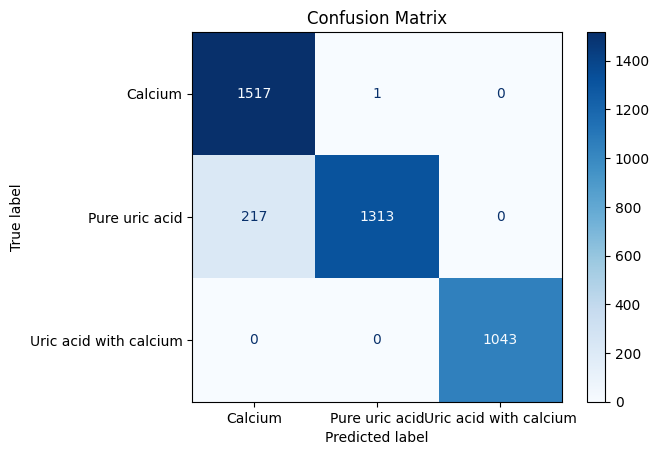

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test_df['y'], test_df["y_pred"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=list(le.classes_))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [132]:
cm 

array([[1517,    1,    0],
       [ 217, 1313,    0],
       [   0,    0, 1043]])

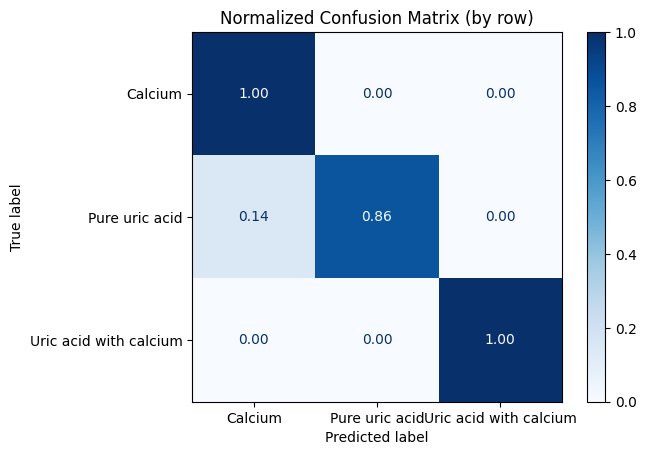

Normalized CM (row-wise):
[[0.999 0.001 0.   ]
 [0.142 0.858 0.   ]
 [0.    0.    1.   ]]


In [133]:


# Нормируем матрицу по строкам (верные метки)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Создаем визуализацию с частотами
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_normalized,
    display_labels=list(le.classes_)
)

# Настраиваем формат отображения (два знака после запятой)
disp.plot(cmap='Blues', values_format='.2f')  # Используйте '.1%' для процентов

plt.title('Normalized Confusion Matrix (by row)')
plt.show()

# Выводим числовое представление матрицы (опционально)
print("Normalized CM (row-wise):")
print(np.round(cm_normalized, 3))

In [134]:
from sklearn.metrics import classification_report

print(classification_report(
    test_df['y'],
    test_df['y_pred'],
    target_names=list(le.classes_)
))

                        precision    recall  f1-score   support

               Calcium       0.87      1.00      0.93      1518
        Pure uric acid       1.00      0.86      0.92      1530
Uric acid with calcium       1.00      1.00      1.00      1043

              accuracy                           0.95      4091
             macro avg       0.96      0.95      0.95      4091
          weighted avg       0.95      0.95      0.95      4091



In [135]:
# Предположим, 'model' - ваша обученная модель
probas = model.predict_proba(X_test_lda)  # shape: [n_samples, n_classes]

# Добавляем вероятности в DataFrame
for i, class_name in enumerate(le.classes_):
    dff[f'prob_{class_name}'] = probas[:, i]

NameError: name 'dff' is not defined

In [ ]:
test_df

0          1  y  y_pred
0     53.213705 -18.743841  2       2
1     53.379528 -18.553824  2       2
2     54.339467 -18.795913  2       2
3     54.189706 -18.902007  2       2
4     53.992424 -19.158678  2       2
...         ...        ... ..     ...
4086 -28.789640   1.157388  0       0
4087 -29.317203   1.191199  0       0
4088 -29.362718   1.234488  0       0
4089 -29.222173   1.449443  0       0
4090 -29.580252   1.217932  0       0

[4091 rows x 4 columns]

In [ ]:
test_df

0          1  y  y_pred
0     53.213705 -18.743841  2       2
1     53.379528 -18.553824  2       2
2     54.339467 -18.795913  2       2
3     54.189706 -18.902007  2       2
4     53.992424 -19.158678  2       2
...         ...        ... ..     ...
4086 -28.789640   1.157388  0       0
4087 -29.317203   1.191199  0       0
4088 -29.362718   1.234488  0       0
4089 -29.222173   1.449443  0       0
4090 -29.580252   1.217932  0       0

[4091 rows x 4 columns]

In [ ]:
probs = model.predict_proba(X_test_lda)
probs

array([[5.02844640e-04, 8.87169348e-02, 9.10780221e-01],
       [5.11500470e-04, 8.40795243e-02, 9.15408975e-01],
       [4.31694816e-04, 7.79304027e-02, 9.21637902e-01],
       ...,
       [9.28328610e-01, 7.11673161e-02, 5.04073506e-04],
       [9.33456651e-01, 6.60465490e-02, 4.96799800e-04],
       [9.27973364e-01, 7.15361258e-02, 4.90510103e-04]], shape=(4091, 3))

In [ ]:
probs_df = pd.DataFrame(probs)
probs_df

0         1         2
0     0.000503  0.088717  0.910780
1     0.000512  0.084080  0.915409
2     0.000432  0.077930  0.921638
3     0.000431  0.080891  0.918678
4     0.000420  0.086707  0.912873
...        ...       ...       ...
4086  0.926232  0.073216  0.000552
4087  0.927233  0.072257  0.000511
4088  0.928329  0.071167  0.000504
4089  0.933457  0.066047  0.000497
4090  0.927973  0.071536  0.000491

[4091 rows x 3 columns]

In [ ]:
test_df["prob_Calcium"] = probs_df[0]
test_df["prob_Uric acid"] = probs_df[1]
test_df["prob_Uric acid calcium"] = probs_df[2]


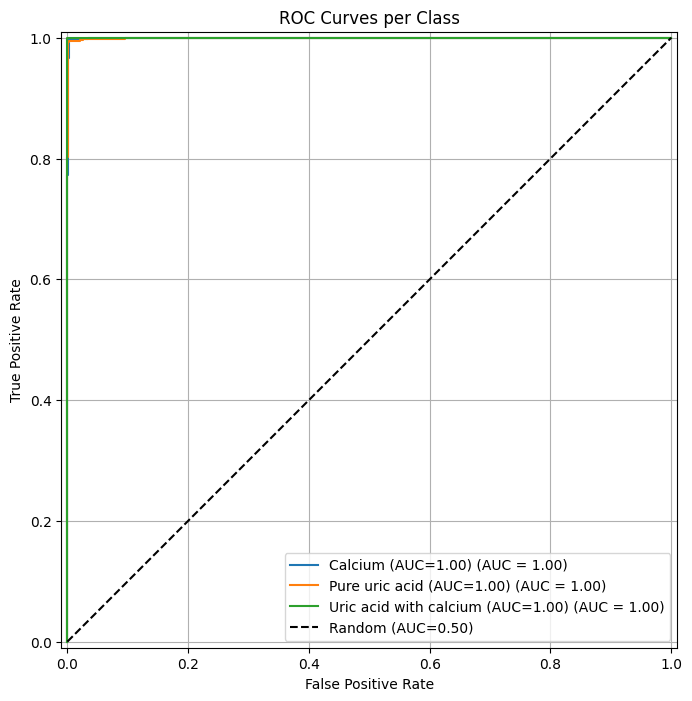

AUC Scores:
Calcium: 0.9997
Pure uric acid: 0.9996
Uric acid with calcium: 1.0000


In [ ]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Преобразуем метки в one-hot encoding
y_true = label_binarize(test_df['y'], classes=[0,1,2,])
y_score = test_df[['prob_Calcium',# "prob_Cystine",
                   'prob_Uric acid', 'prob_Uric acid calcium']].values

fig, ax = plt.subplots(figsize=(10, 8))

# Создадим словарь для хранения AUC значений
auc_scores = {}

for i, cls in enumerate(le.classes_):
    # Вычисляем ROC кривую и AUC
    fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    auc_scores[cls] = roc_auc
    
    # Строим кривую с подписью (включая AUC)
    RocCurveDisplay(
        fpr=fpr,
        tpr=tpr,
        roc_auc=roc_auc,
        estimator_name=f"{cls} (AUC={roc_auc:.2f})"
    ).plot(ax=ax)

# Добавляем диагональ (random classifier)
ax.plot([0, 1], [0, 1], 'k--', label="Random (AUC=0.50)")

ax.set_title("ROC Curves per Class")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend(loc='lower right')  # Лучшее расположение для ROC
ax.grid()
plt.show()

# Дополнительно: выведем AUC значения
print("AUC Scores:")
for cls, score in auc_scores.items():
    print(f"{cls}: {score:.4f}")

In [ ]:
from sklearn.metrics import roc_auc_score
n_classes = len(le.classes_)
y_test = dff['y']
y_bin = label_binarize(y_test, classes=np.arange(n_classes))
# Macro-average AUC
macro_auc = roc_auc_score(y_bin, probas, average='macro')
print(f"Macro-average ROC AUC: {macro_auc:.4f}")

# Micro-average AUC
micro_auc = roc_auc_score(y_bin, probas, average='micro')
print(f"Micro-average ROC AUC: {micro_auc:.4f}")

Macro-average ROC AUC: 0.9997
Micro-average ROC AUC: 0.9956


In [ ]:
test_df.to_excel("LDA_compressed_data_test_metrics.xlsx")